# Overview

Notebook for creating plots that shows the spatial distribution of data in Cataluña.

Software used: geopandas phyton library.

In [1]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

Root to the data file:

In [7]:
data_dir= 'carto'

# Create Cataluña map

Notebook section used to create the Cataluña (only provinces) map from Spain map.

Downloaded from http://centrodedescargas.cnig.es/CentroDescargas/index.jsp > Mapas vectoriales y Bases Cartográficas y Topográficas:

    BCN500
    Description: Base Cartográfica Nacional a escala 1:500.000.
    SGR: ETRS89. Coordenadas geográficas longitud y latitud.
    Download entity: toda España y por capas temáticas.
    Format: shapefile (.shp)

In [8]:
# Load shape file into GeoDataFrame
spain = gpd.read_file(data_dir + "/BCN500_0101S_LIMITE_ADM.shp", crs="EPSG:4326")

# Filter countries out, with boolean filtering, just as you would do for pandas DataFrames
# CCAA is the abbreviation for Autonomous region in Spain
spain = spain[~spain["CCAA"].isin(["SAHARA OCCIDENTAL", "ALGERIA", "PORTUGAL", 'MARRUECOS', 'MAURITANIA','FRANCIA', 'ANDORRA'])]
Cataluña = spain[spain["CCAA"].isin(['Cataluña'])]

<Axes: >

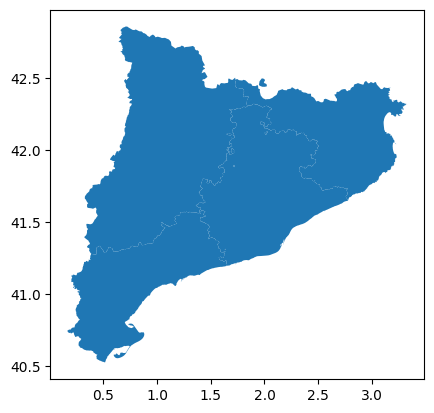

In [9]:
Cataluña.plot()

## Saving the Cataluña's map

In [10]:
# in several files including a shp file
Cataluña.to_file(data_dir + "/Cataluña.shp")